['Setosa' 'Versicolor' 'Virginica']


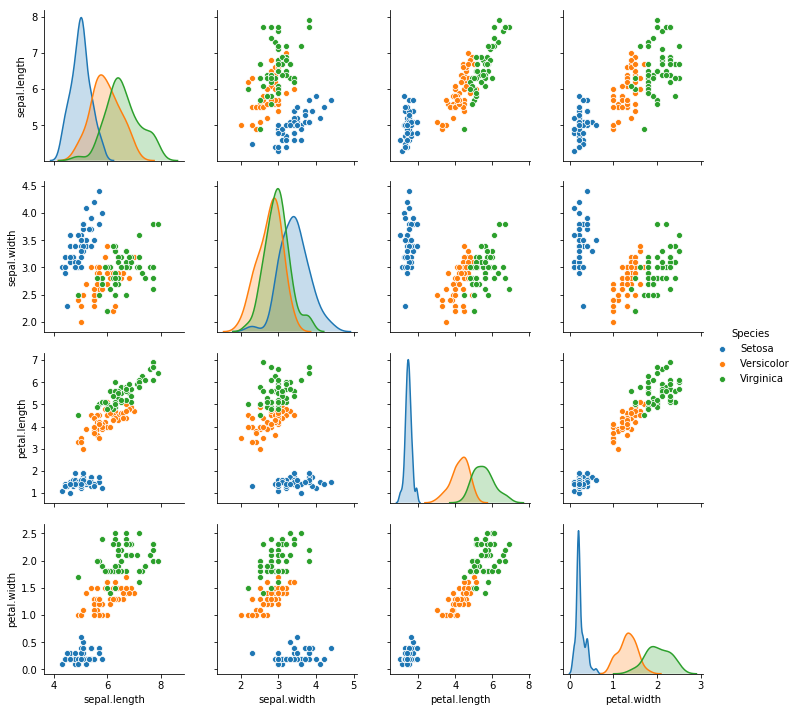

In [7]:
import pandas as pd
data=pd.read_csv("iris.csv")
len(data)
data[:5]
print(data['Species'].unique())
import seaborn as sns
sns.pairplot(data, hue='Species')

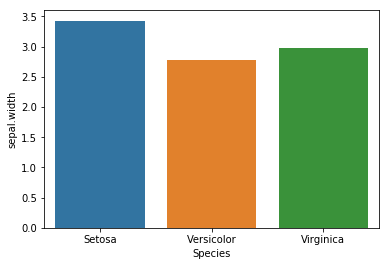

In [9]:
sns.barplot(data['Species'], data['sepal.width'],ci=None)

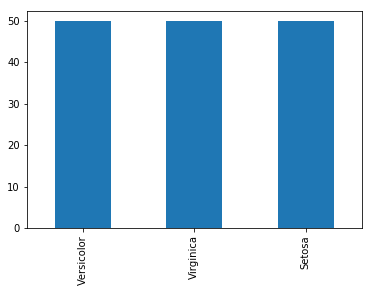

In [11]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

In [17]:
data['Species']=data['Species'].replace(['Setosa','Versicolor','Virginica'],[0,1,2])


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

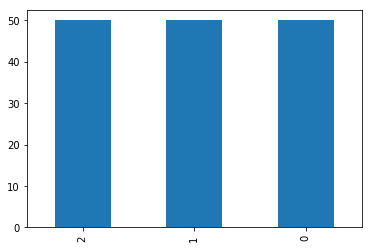

In [20]:
data['Species'].value_counts().plot(kind='bar')

In [30]:
#data.info()
datax=data[['sepal.length', 'sepal.width','petal.length','petal.width']].values
datay=data['Species'].values
print(datax[:5])
print(data[:5])

#datay=

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
   sepal.length  sepal.width  petal.length  petal.width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [31]:
from sklearn.model_selection import train_test_split

In [38]:
(xtrain,xtest, ytrain,ytest)=train_test_split(datax,datay, train_size=0.8, random_state=1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
from keras.utils import np_utils
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)


In [41]:
ytrain
ytest

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [43]:
#소프트맥스 회귀
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [46]:
model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01) #학습률
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(xtrain,ytrain, batch_size=1, epochs=200, validation_data=(xtest, ytest))

W0814 09:53:05.622888  2996 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 09:53:05.662781  2996 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 5.6130 - acc: 0.3083 - val_loss: 4.3892 - val_acc: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 764us/step - loss: 3.9589 - acc: 0.3083 - val_loss: 3.1369 - val_acc: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 715us/step - loss: 2.5548 - acc: 0.3083 - val_loss: 2.2998 - val_acc: 0.4333
Epoch 4/200
120/120 [==============================] - 0s 731us/step - loss: 1.8832 - acc: 0.5167 - val_loss: 2.0054 - val_acc: 0.4333
Epoch 5/200
120/120 [==============================] - 0s 773us/step - loss: 1.6578 - acc: 0.5167 - val_loss: 1.8538 - val_acc: 0.2333
Epoch 6/200
120/120 [==============================] - 0s 748us/step - loss: 1.5353 - acc: 0.3917 - val_loss: 1.7300 - val_acc: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 814us/step - loss: 1.4339 - acc: 0.4167 - val_loss: 1.6268 - val_acc: 0.2000
Epoch 8/200


Epoch 61/200
120/120 [==============================] - 0s 748us/step - loss: 0.3517 - acc: 0.9167 - val_loss: 0.3938 - val_acc: 0.9000
Epoch 62/200
120/120 [==============================] - 0s 748us/step - loss: 0.3473 - acc: 0.9333 - val_loss: 0.3900 - val_acc: 0.9000
Epoch 63/200
120/120 [==============================] - 0s 748us/step - loss: 0.3422 - acc: 0.9583 - val_loss: 0.4048 - val_acc: 0.8333
Epoch 64/200
120/120 [==============================] - 0s 740us/step - loss: 0.3394 - acc: 0.9417 - val_loss: 0.4138 - val_acc: 0.8000
Epoch 65/200
120/120 [==============================] - 0s 723us/step - loss: 0.3378 - acc: 0.9167 - val_loss: 0.3860 - val_acc: 0.8667
Epoch 66/200
120/120 [==============================] - 0s 723us/step - loss: 0.3350 - acc: 0.9583 - val_loss: 0.3953 - val_acc: 0.8333
Epoch 67/200
120/120 [==============================] - 0s 723us/step - loss: 0.3335 - acc: 0.9417 - val_loss: 0.3858 - val_acc: 0.8333
Epoch 68/200
120/120 [==========================

120/120 [==============================] - 0s 756us/step - loss: 0.2293 - acc: 0.9667 - val_loss: 0.2765 - val_acc: 0.9333
Epoch 122/200
120/120 [==============================] - 0s 731us/step - loss: 0.2290 - acc: 0.9583 - val_loss: 0.2739 - val_acc: 0.9333
Epoch 123/200
120/120 [==============================] - 0s 740us/step - loss: 0.2275 - acc: 0.9583 - val_loss: 0.2655 - val_acc: 0.9667
Epoch 124/200
120/120 [==============================] - 0s 731us/step - loss: 0.2255 - acc: 0.9583 - val_loss: 0.2686 - val_acc: 0.9667
Epoch 125/200
120/120 [==============================] - 0s 723us/step - loss: 0.2250 - acc: 0.9667 - val_loss: 0.2777 - val_acc: 0.9000
Epoch 126/200
120/120 [==============================] - 0s 723us/step - loss: 0.2236 - acc: 0.9583 - val_loss: 0.2749 - val_acc: 0.9333
Epoch 127/200
120/120 [==============================] - 0s 731us/step - loss: 0.2242 - acc: 0.9583 - val_loss: 0.2600 - val_acc: 0.9667
Epoch 128/200
120/120 [==============================] 

Epoch 181/200
120/120 [==============================] - 0s 790us/step - loss: 0.1732 - acc: 0.9667 - val_loss: 0.2168 - val_acc: 0.9667
Epoch 182/200
120/120 [==============================] - 0s 706us/step - loss: 0.1725 - acc: 0.9667 - val_loss: 0.2145 - val_acc: 0.9667
Epoch 183/200
120/120 [==============================] - 0s 848us/step - loss: 0.1728 - acc: 0.9583 - val_loss: 0.2153 - val_acc: 0.9667
Epoch 184/200
120/120 [==============================] - 0s 756us/step - loss: 0.1705 - acc: 0.9667 - val_loss: 0.2090 - val_acc: 0.9667
Epoch 185/200
120/120 [==============================] - 0s 748us/step - loss: 0.1691 - acc: 0.9667 - val_loss: 0.2051 - val_acc: 1.0000
Epoch 186/200
120/120 [==============================] - 0s 731us/step - loss: 0.1693 - acc: 0.9667 - val_loss: 0.2172 - val_acc: 0.9667
Epoch 187/200
120/120 [==============================] - 0s 731us/step - loss: 0.1687 - acc: 0.9750 - val_loss: 0.2072 - val_acc: 0.9667
Epoch 188/200
120/120 [==================

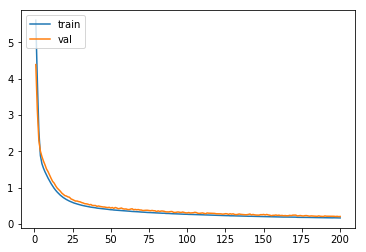

In [53]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#history.history['loss']


In [61]:
print("테스트 정확도: %.4f" % (model.evaluate(xtest,ytest)[1]))

30/30 [==============================] - 0s 0us/step
테스트 정확도: 0.9667


In [ ]:
model=Sequential()
model.add(Dense(8, input_dim=4, activation='relu', init='uniform'))
# X=(1,4), W=(4,8), B(1,8) =Y (1,8)
model.add(Dense(8, activation='relu')
# X=(1,8), W=(8,8), B(1,8) =Y (1,8)
model.add(Dense(3, activation='softmax')
#X=(1,8), W=(8,3), B(1,3) =Y (1,3)         

          #손실함수
#MSE, CE

In [ ]:
# modelfit(xtrain, ytrain, batch_size=len(trainx))
# #배치경사하강법:1에폭에 모든 매개변수 업데이트를 한 번 수행

# model.fit(xtrain, ytrain, batch_size=16)
# #미니배치

# model.fit(xtrain, ytrain, batch_size=1)
# #SGD(확률적 경사 하강법)

# keras.optimizers.SGD(lr=0.01, momentum=0.9)

# https://keras.io/optimizers

In [71]:
from keras.preprocessing.text  import Tokenizer
t=Tokenizer()
fitText="The earth is an awesome place live" #코퍼스
#t.fit_on_texts([fitText]) #문자 단위
t.fit_on_texts([fitText]) #단어 단위
print(t.word_index)

test="The earth is an great place live"
t.texts_to_sequences([test])[0]


{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


[1, 2, 3, 4, 6, 7]

In [77]:
#padding:길이를 동일하게 맞춰주는 작업 => pad_sequence()
from keras.preprocessing.sequence import pad_sequences
pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5, padding='post')

array([[10, 20, 30,  0,  0],
       [40, 50,  0,  0,  0],
       [60, 70, 80, 90,  0]])

In [ ]:
#워드 임베딩:단어들을 밀집벡터로 변환하는 것
#[0000000000010000000000...00000000000]:희소벡터(1000차원,0 or 1)
#[0.1 0.5 -1.5 1.8]:밀집벡터(4차원, 실수)
#Embedding(정수로된 단어)
#Embedding(단어집합크기,벡터의크기,입력단어 시퀀스길이 )
#Embedding(1000, 2, 3)
#text=[['to', 'you','I'],['You', 'Hi','Good'],...]
#index    emb
# 0       [1.5, 3.5]
# ...          ...
# 999     [5.5, 10.8]

In [ ]:
#Sequential:층을 구성 => model => model.add()
# ex)
# model=Sequential()
# model.add(Embedding(voc, size, lnegth))

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit():실제학습
#model.fit(xtrain, ytrain, epochs=10, batch_size=64, validation_data(xval, yval))
#model.evaluate(xtest, ytest, batch_size=32)

model.predict(xinput, batch_size=32)

#모델 저장
model.save("my_model.h5")
#모델 불러오기
from keras.models import load_model
model=load_model("my_model.h5")



In [ ]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
feed={x:xdata, y:ydata}

saver=tf.train.Saver()
for i in range(2001):
    sess.run(train, feed_dict=feed)
    if i%20==0:
        print(i, sess.run(cost, feed_dict=feed))
        #saver.save(sess, 'Model/second', global_step=i)
saver.save(sess, 'Model/first')

0 0.22719961
20 0.058446456
40 0.022082658
60 0.008343435
80 0.0031523684
100 0.0011910485
120 0.00045000995
140 0.00017002712
160 6.424145e-05
180 2.4271152e-05
200 9.170444e-06
220 3.4649313e-06
240 1.3090934e-06
260 4.946818e-07
280 1.8692064e-07
300 7.06084e-08
320 2.6666044e-08
340 1.0082317e-08
360 3.8104417e-09
380 1.4390859e-09
400 5.443752e-10
420 2.0620898e-10
440 7.7098626e-11
460 2.977174e-11
480 1.0994465e-11
500 4.301152e-12
520 1.5916157e-12
540 5.684342e-13
560 3.410605e-13
580 9.473903e-14
600 6.158037e-14
620 6.158037e-14
640 2.3684757e-14
660 4.7369517e-15
680 0.0
700 0.0
720 0.0
740 0.0
760 0.0
780 0.0
800 0.0
820 0.0
840 0.0
860 0.0
880 0.0
900 0.0
920 0.0
940 0.0
960 0.0
980 0.0
1000 0.0
1020 0.0
1040 0.0
1060 0.0
1080 0.0
1100 0.0
1120 0.0
1140 0.0
1160 0.0
1180 0.0
1200 0.0
1220 0.0
1240 0.0
1260 0.0
1280 0.0
1300 0.0
1320 0.0
1340 0.0
1360 0.0
1380 0.0
1400 0.0
1420 0.0
1440 0.0
1460 0.0
1480 0.0
1500 0.0
1520 0.0
1540 0.0
1560 0.0
1580 0.0
1600 0.0
1620 0.0
16

In [1]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
saver=tf.train.Saver()

latest=tf.train.latest_checkpoint('Model')
print(latest)
saver.restore(sess,latest)
print(sess.run(hf, feed_dict={x:[5,7]}))


W0814 14:01:13.950468 10336 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 14:01:14.013873 10336 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Model\first


DataLossError: Checksum does not match: stored 2208565267 vs. calculated on the restored bytes 2118156850
	 [[node save/RestoreV2 (defined at <ipython-input-1-c65756f73455>:16) ]]

Original stack trace for 'save/RestoreV2':
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\user\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\user\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\user\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-c65756f73455>", line 16, in <module>
    saver=tf.train.Saver()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1779, in restore_v2
    name=name)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [3]:
#함수형 API 신경망 구성
from keras.layers import Input, Dense
from keras.models import Model
inputs=Input(shape=(10,)) #입력 10개
h1=Dense(64, activation='relu')(inputs)
h2=Dense(64, activation='relu')(h1)
output=Dense(1, activation='sigmoid')(h2)
model=Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(데이터, 레이블)


W0814 14:22:19.824269 10336 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

